# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [28]:
file_path = './Real estate.csv'
data = pd.read_csv(file_path)
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [30]:
num_samples, num_columns = data.shape
print(f"Number of samples: {num_samples}, Number of columns: {num_columns}")

Number of samples: 414, Number of columns: 8


### What are the features available in the dataset?

In [31]:
print(data.columns)

Index(['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area'], dtype='object')


### Check if any features have missing data

In [32]:
print(data.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [33]:
X = data.iloc[:, :-1]  
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase width for single-line display

# Print the resulting table
print(X)
  

      No  X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude
0      1             2012.917          32.0                                84.87882                               10     24.98298     121.54024
1      2             2012.917          19.5                               306.59470                                9     24.98034     121.53951
2      3             2013.583          13.3                               561.98450                                5     24.98746     121.54391
3      4             2013.500          13.3                               561.98450                                5     24.98746     121.54391
4      5             2012.833           5.0                               390.56840                                5     24.97937     121.54245
..   ...                  ...           ...                                     ...                              ...          ...       

### Group feature(s) as independent features in y

In [34]:
y = data.iloc[:, -1]  
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Choose the model (Linear Regression)

In [47]:
from sklearn.linear_model import LinearRegression


### Create an Estimator object

In [48]:
model = LinearRegression()


### Train the model

In [49]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [55]:
y_pred = model.predict(X_test)
output = np.array(y_pred)

# Display output
print(repr(output))

array([47.04645871, 40.40783016, 43.37463978, 39.20600382, 26.62817953,
       45.8923956 , 44.33888897, 46.74448468, 24.43235155, 55.06258487,
       34.60848974, 36.92386329, 36.76420984, 24.30494918, 35.79519845,
       33.44810036, 44.24993318, 44.98654734, 29.18096544, 44.80711275,
        1.15259949, 36.10694406, 47.26486776, 45.90792727, 10.96198835,
       38.69069634, 12.57701679, 43.61237869, 35.7142565 , 37.55475044,
       14.14012034, 40.46209983, 35.90891223, 28.5174525 , 47.38286733,
       30.9022379 , 50.43545093, 12.92669013, 48.95222574, 39.27068588,
       39.3872837 , 40.09381011, 48.20107097, 37.08010208, 39.54765933,
       47.348201  , 43.3815801 , 21.07747224, 47.05299802, 44.57951775,
       48.24233055, 48.12297596, 41.42189435, 42.25141469, 36.32214409,
       15.69024514, 37.64733588, 35.12221291, 29.08561558, 46.86297981,
       32.07763941, 33.25961566, 15.22965501,  9.01697131,  9.37929873,
       33.78712833, 29.59931587, 47.50139803, 33.81312917, 31.84

### Display the coefficients

In [54]:
coefficients = model.coef_
print(repr(coefficients))

array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
        1.08114445e+00,  2.26048799e+02, -3.01254914e+01])


### Find how well the trained model did with testing data

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2 Score : {r2}")

Mean Squared Error: 54.60196067337745
r2 Score : 0.6745228670350851


### Plot House Age Vs Price
#### Hint: Use regplot in sns

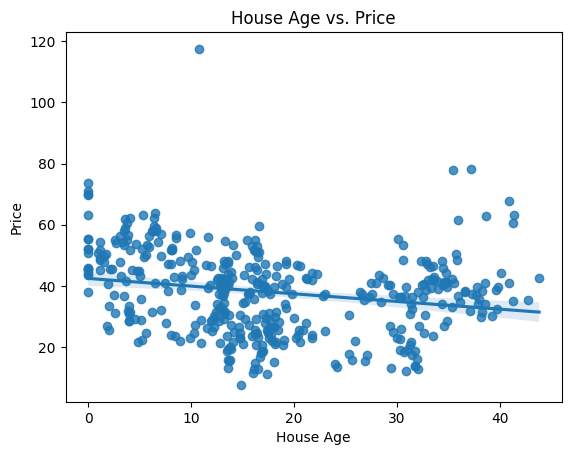

In [57]:
sns.regplot(x=data['X2 house age'], y=data['Y house price of unit area'])
plt.title('House Age vs. Price')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

### Plot Distance to MRT station Vs Price

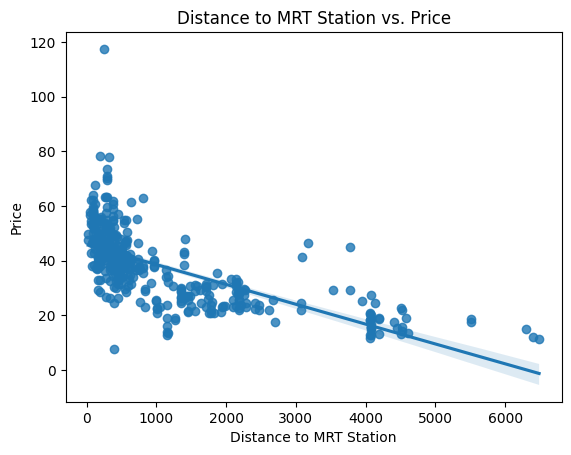

In [58]:
sns.regplot(x=data['X3 distance to the nearest MRT station'], y=data['Y house price of unit area'])
plt.title('Distance to MRT Station vs. Price')
plt.xlabel('Distance to MRT Station')
plt.ylabel('Price')
plt.show()

### Plot Number of Convienience Stores Vs Price

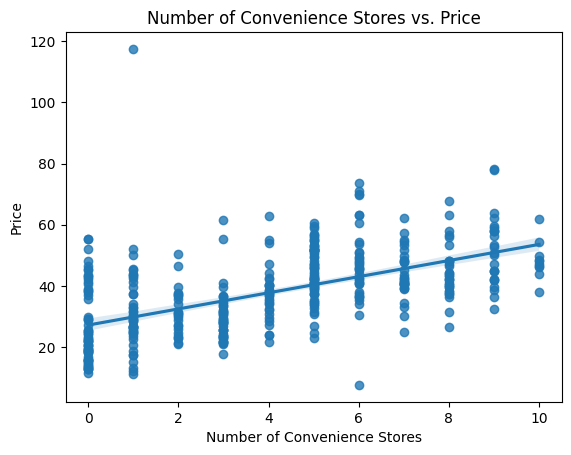

In [59]:
sns.regplot(x=data['X4 number of convenience stores'], y=data['Y house price of unit area'])
plt.title('Number of Convenience Stores vs. Price')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Price')
plt.show()